In [17]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2024-05-22
# @Filename: 240522_PointInfo.ipynb

import matplotlib.pyplot as plt
import shutil
import numpy as np
import glob
import os

import pandas as pd
import h5py


In [18]:
seondeok_snapshot_file_path = glob.glob(f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.*.hdf5")
# seondeok_snapshot_file_path

In [19]:
len_dt = len(seondeok_snapshot_file_path)
ID_df = []; len_df = []
x_min = []; x_max = []
y_min = []; y_max = []
z_min = []; z_max = []

In [20]:
OSError_dir = "/home/users/mmingyeong/tng/tng_99_240425/tng_local/OSError"
for num in range(500, 600):
    print(num)
    ID_df.append(num)
    
    file = f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.{num}.hdf5"
    if os.path.isfile(file):
        f = h5py.File(file, 'r')
        PartType1 = f['PartType1']
        dm_pos = PartType1["Coordinates"][:]
        dm_pos = dm_pos*0.001 # kpc -> Mpc 단위 변경
        dm_pos = dm_pos.astype(np.float64) # 데이터 타입 변경
        
        len_df.append(len(dm_pos))
        x = dm_pos[:, 0]
        x_min.append(min(x))
        x_max.append(max(x))
        
        y = dm_pos[:, 1]
        y_min.append(min(y))
        y_max.append(max(y))
        
        z = dm_pos[:, 2]    
        z_min.append(min(z))
        z_max.append(max(z))
    else:
        len_df.append(None)
        x_min.append(None)
        x_max.append(None)
        
        y_min.append(None)
        y_max.append(None)
   
        z_min.append(None)
        z_max.append(None)
        pass
    #try:
        #f = h5py.File(file, 'r')
    #except OSError:
    #    shutil.move(file, OSError_dir)
    #    print(f"file {num} has OSError")
    #    pass
            


500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599


In [21]:
dm_df = pd.DataFrame({"ID":ID_df, "x_min [cMpc/h]":x_min, "x_max [cMpc/h]":x_max, "y_min [cMpc/h]":y_min, "y_max [cMpc/h]":y_max, "z_min [cMpc/h]":z_min, "z_max [cMpc/h]":z_max, "len": len_df})
# dm_df

Text(0, 0.5, 'value [cMpc/h]')

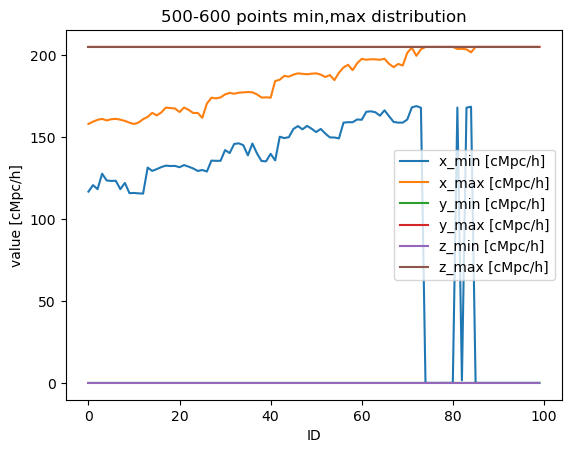

In [22]:
ax = dm_df.plot(y=["x_min [cMpc/h]", "x_max [cMpc/h]", "y_min [cMpc/h]", "y_max [cMpc/h]", "z_min [cMpc/h]", "z_max [cMpc/h]"], title='500-600 points min,max distribution')
ax.set_xlabel('ID')
ax.set_ylabel('value [cMpc/h]')

In [23]:
dm_df.to_csv('./snapshot9_PointInfo_500-600.txt', sep = '\t', index=False)

In [24]:
from tabulate import tabulate

# tabulate 패키지를 사용하여 테이블 형식으로 변환
table = tabulate(dm_df.values, headers=dm_df.columns, tablefmt='plain', )

# 텍스트 파일로 저장
with open('./snapshot9_PointInfo_aligned_500-600.txt', 'w') as f:
    f.write(table)